In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Conv2D, MaxPool2D

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from random import shuffle
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils

## Convolution 결과 이미지 확인

### 샘플 이미지 준비

In [35]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

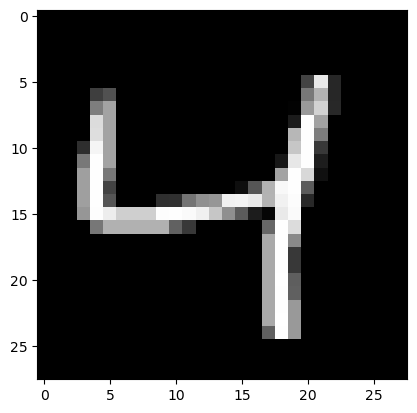

In [36]:
plt.imshow(X_train[2], cmap="gray")

## 필터 준비

In [37]:
horizontal_filter = np.array([[1., 1., 1.], [0., 0., 0.], [-1., -1., -1.]])
vertical_filter = np.array([[1., 0., -1.], [1., 0., -1.], [1., 0., -1.]])
sharpen_filter = np.array([[0., -1., 0.], [-1., 5., -1.], [0., -1., 0.]])
blur_filter = np.array([[0.11, 0.11, 0.11], [0.11, 0.11, 0.11], [0.11, 0.11, 0.11]])
edge_1_filter = np.array([[1., 0., -1.], [0., 0., 0.], [-1., 0., 1.]])
edge_2_filter = np.array([[0., -1., 0.], [-1., 4., -1.], [0., -1., 0.]])
edge_3_filter = np.array([[-1., -1., -1.], [-1., 8., -1.], [-1., -1., -1.]])

## Concolution 공식을 함수화

In [38]:
def conv2d_simple(input_image, filter, filter_size):
    original_image_size = input_image.shape[0]
    conv_output_size = int(((original_image_size - filter_size)/1 + 1))
    print(conv_output_size)
    
    filter_image = np.zeros((conv_output_size, conv_output_size))
    
    for i in range(conv_output_size):
        for j in range(conv_output_size):
            conv_result = input_image[i:(i+filter_size), j:(j+filter_size)] * filter
            conv_sum = np.sum(conv_result)
            
            if(conv_sum > 255):
                conv_sum = 255
            
            filter_image[i, j] = conv_sum
            
    return filter_image

In [39]:
vertical_filter_image = conv2d_simple(X_train[2], vertical_filter,3)

26


In [40]:
print(vertical_filter_image.shape)

(26, 26)


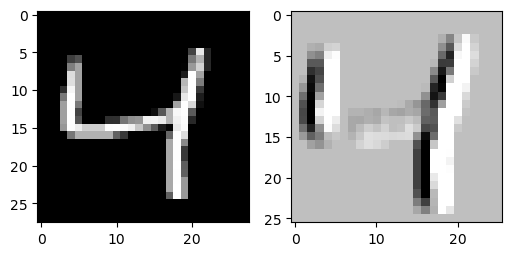

In [41]:
plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
plt.imshow(X_train[2], cmap="gray")

plt.subplot(1,2,2)
plt.imshow(vertical_filter_image, cmap="gray")

NameError: name 'horizontal_filter_image' is not defined

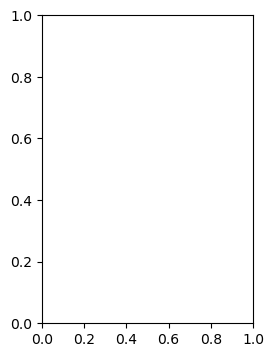

In [42]:
plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
plt.imshow(horizontal_filter_image, cmap="gray")

plt.subplot(1,2,2)
plt.imshow(sharpen_filter_image, cmap="gray")

## Max Pooling 을 함수화

In [ ]:
def maxpooling2d_simple(input_image):
    image_x = input_image.shape[0]
    image_y = input_image.shape[1]
    
    new_image_x = int(image_x / 2)
    new_image_y = int(image_y / 2)
    
    max_pool_image = np.zeros((new_image_x, new_image_y))
    
    for i in range(0, image_x, 2):
        for y in range(0, image_y, 2):
            max_pool_image[int(x/2), int(y/2)]=np.max 
                np.max(input_image[x:])

In [ ]:
vertical_filter_image = conv2d_simple(X_train[2], vertical_filter, 3)
print(vertical_filter_image.shape)

maxpooling2d_simple(vertical_filter_image)

## 2 . Simple CNN

- mnist

In [43]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train/255
X_test = X_test/255

In [44]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [47]:
model = Sequential()

model.add(Conv2D(filter=32, kernal_size=3, strides=(1,1),
                input_shape=(28, 28, 1), padding="VALID",
                activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), padding="VALID"))

model.add(Flatten())

model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
             optimizer=Adam(learning_rate=0.001),
             metrics=["accuracy"])

model.summary()

TypeError: __init__() missing 2 required positional arguments: 'filters' and 'kernel_size'

## Fashion MNIST

In [49]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## 오답노트

In [60]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train/255
X_test = X_test/255

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, strides=(1,1),
                input_shape=(28, 28, 1), padding="VALID",
                activation="relu"))

model.add(MaxPool2D(pool_size=(2,2), padding="VALID"))

model.add(Flatten())

model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
             optimizer=Adam(learning_rate=0.01),
             metrics=["accuracy"])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [61]:
result = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10,
         batch_size=50,
         validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 12s 244us/sample - loss: 0.1419 - acc: 0.9560 - val_loss: 0.0864 - val_acc: 0.9753
Epoch 2/10
48000/48000 [==============================] - 12s 242us/sample - loss: 0.0664 - acc: 0.9799 - val_loss: 0.0870 - val_acc: 0.9754
Epoch 3/10
48000/48000 [==============================] - 12s 242us/sample - loss: 0.0472 - acc: 0.9856 - val_loss: 0.0841 - val_acc: 0.9772
Epoch 4/10
48000/48000 [==============================] - 12s 240us/sample - loss: 0.0386 - acc: 0.9881 - val_loss: 0.0748 - val_acc: 0.9795
Epoch 5/10
48000/48000 [==============================] - 12s 243us/sample - loss: 0.0308 - acc: 0.9900 - val_loss: 0.1238 - val_acc: 0.9713
Epoch 6/10
48000/48000 [==============================] - 12s 242us/sample - loss: 0.0261 - acc: 0.9916 - val_loss: 0.0981 - val_acc: 0.9783
Epoch 7/10
48000/48000 [==============================] - 12s 240us/sample - loss: 0.0254 - acc: 0.9914 

In [63]:
ret_val = model.predict(X_test.reshape(-1, 28, 28, 1))

In [64]:
print(ret_val.shape)
print(ret_val)

(10000, 10)
[[6.0720929e-15 2.0466442e-23 1.7094553e-15 ... 1.0000000e+00
  6.0107046e-13 1.5244748e-15]
 [2.9257384e-16 7.6128125e-19 1.0000000e+00 ... 5.3345946e-31
  8.1743332e-20 9.1916277e-21]
 [5.7981775e-12 9.9999666e-01 1.2597032e-10 ... 1.6678437e-07
  5.9964663e-08 1.6557665e-10]
 ...
 [3.9191606e-33 9.1117142e-29 1.5866262e-28 ... 5.9600669e-19
  2.7108944e-18 3.0072871e-18]
 [2.9535387e-15 6.5322368e-33 9.3166759e-26 ... 3.8796548e-17
  1.7936573e-12 4.7306500e-21]
 [4.2793287e-23 1.7404028e-35 2.5602195e-17 ... 2.8739868e-34
  1.0110322e-21 9.8946823e-27]]


In [65]:
false_data_index = np.random(len(index_label_pred_list))

NameError: name 'index_label_pred_list' is not defined

## Simple CNN

- C-> P -> C-> P ->F ->D ->D

In [66]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train/255
X_test = X_test/255

In [68]:
model = Sequential()

## 1st Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME",
                input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(padding="SAME"))

## 2nd Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME",
                input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(padding="SAME"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.add(Flatten())

model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                50208     
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [70]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = Adam(learning_rate=0.01),
             metrics=["accuracy"])

model.fit(X_train, y_train, epochs=20, validation_split=0.2,
         batch_size=1000)

ValueError: Error when checking input: expected conv2d_2_input to have 4 dimensions, but got array with shape (60000, 28, 28)

In [71]:
model.evaluate(X_test, y_test)

ValueError: Error when checking input: expected conv2d_2_input to have 4 dimensions, but got array with shape (10000, 28, 28)

## Deep CNN

# 실습

In [72]:
"""
1. fashion mnist 사용
2. c p c p c p f d
3. 최소 90프로 이상의 성능
"""

'\n1. fashion mnist 사용\n2. cpcpcpfd\n3. 최소 90프로 이상의 성능\n'

In [73]:
"""
1. fashion mnist 사용
2. c c p c c p f d
3. 최소 90프로 이상의 성능
"""

'\n1. fashion mnist 사용\n2. c c p c c p f d\n3. 최소 90프로 이상의 성능\n'

In [74]:
from tensorflow.keras.datasets import cifar10

In [75]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 185s 1us/step


In [99]:
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [100]:
print(y_train.shape, y_test.shape)

(50000, 1) (10000, 1)


In [101]:
X_train = np.reshape(X_train, (X_train.shape[0], 32, 32, 3))

In [102]:
X_train = X_train/255
X_test = X_test/255

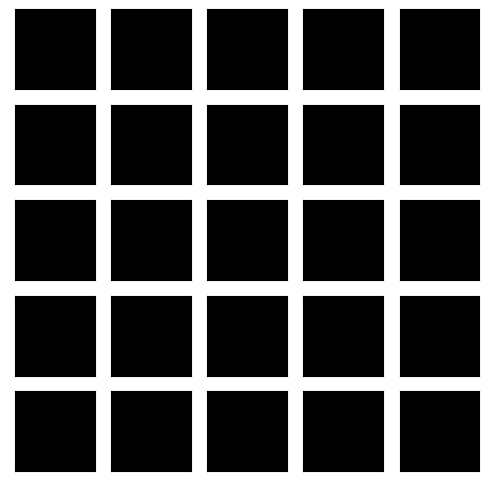

In [103]:
plt.figure(figsize=(6,6))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])

In [79]:
"""
1. cpcpcp, ccpccpcpcp 등 다양한 아키텍처로 구현해서 과적합을 최소로 하는 80프로 이상의 정확도를 가진
모델을 만든 후 저장

model.save(".h5")

SyntaxError: EOF while scanning triple-quoted string literal (2816954255.py, line 5)

In [113]:
model = Sequential()

## 1st Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME",
                input_shape=(32, 32, 3), activation="relu"))
model.add(MaxPool2D(padding="SAME"))

## 2nd Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME",
                activation="relu"))
model.add(MaxPool2D(padding="SAME"))

## 3rd Convolution Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="SAME",
                activation="relu"))
model.add(MaxPool2D(padding="SAME"))

## Flatten the output from 3D to 1D
model.add(Flatten())

## Fully connected layer
model.add(Dense(128, activation="relu"))

## Output layer
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)             

In [114]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [115]:
model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=1000)


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 22s 542us/sample - loss: 2.3032 - acc: 0.1002 - val_loss: 2.3029 - val_acc: 0.1025
Epoch 2/20
40000/40000 [==============================] - 23s 576us/sample - loss: 2.3029 - acc: 0.0984 - val_loss: 2.3027 - val_acc: 0.0952
Epoch 3/20
40000/40000 [==============================] - 23s 568us/sample - loss: 2.3028 - acc: 0.0993 - val_loss: 2.3029 - val_acc: 0.0977
Epoch 4/20
40000/40000 [==============================] - 23s 568us/sample - loss: 2.3029 - acc: 0.0994 - val_loss: 2.3030 - val_acc: 0.0980
Epoch 5/20
40000/40000 [==============================] - 23s 573us/sample - loss: 2.3031 - acc: 0.0979 - val_loss: 2.3028 - val_acc: 0.1014
Epoch 6/20
40000/40000 [==============================] - 23s 586us/sample - loss: 2.3029 - acc: 0.0977 - val_loss: 2.3028 - val_acc: 0.0997
Epoch 7/20
40000/40000 [==============================] - 24s 592us/sample - loss: 2.3029 - acc: 0.0992 